## 1. Данные моей статистики "Акции Starbucks с 1992 по 2023 гг"

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from scipy.stats import norm

In [11]:
df = pd.read_csv('SBUX.csv')

In [27]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.268461,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.287190,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.277825,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.284069,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.284069,13996800
...,...,...,...,...,...,...,...
7732,2023-03-10,100.620003,101.239998,99.029999,99.379997,99.379997,6641000
7733,2023-03-13,98.910004,100.199997,98.370003,99.080002,99.080002,6408200
7734,2023-03-14,100.110001,100.379997,98.470001,99.459999,99.459999,6248800
7735,2023-03-15,98.400002,99.370003,97.279999,99.339996,99.339996,6603300


$\textbf{Визуализация за весь промежуток времени:}$

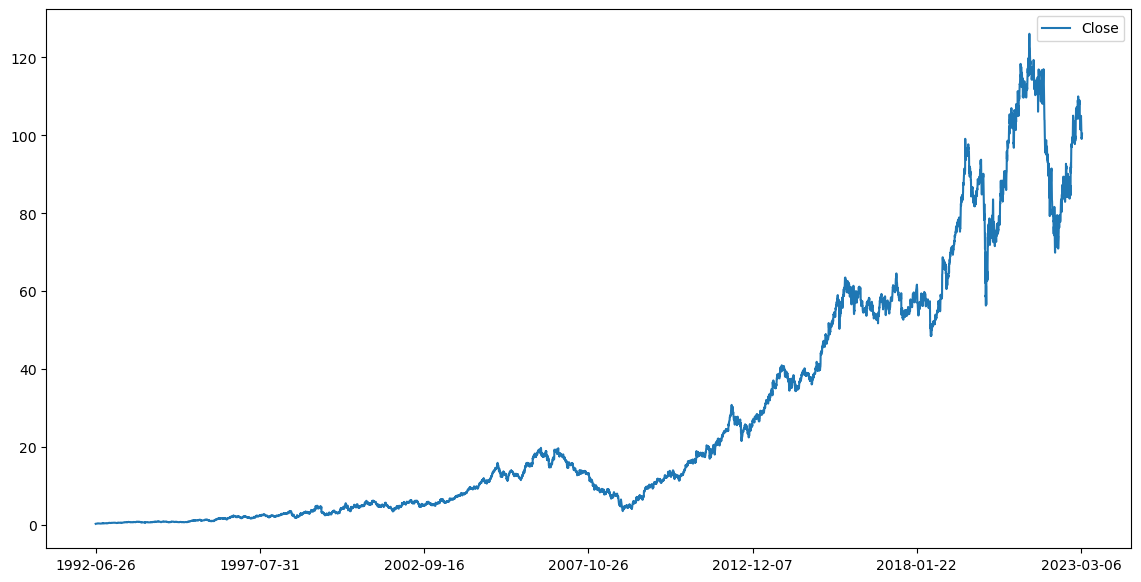

In [25]:
df1 = pd.DataFrame({"Close": df["Close"]})
fig = df1.plot(figsize=(14, 7))
plt.xticks(range(0, len(df), len(df) // 6 - 1), df["Date"][::(len(df)//6 - 1)])
plt.show()

$\textbf{Построение выборки и вариационного ряда за весь промежуток времени:}$

In [28]:
sample = df['Close'].to_numpy()
print('Выборка:')
print(sample)

Variational_series = np.sort(sample)

print('Вариационный ряд:')
print(Variational_series)

Выборка:
[  0.335938   0.359375   0.347656 ...  99.459999  99.339996 100.43    ]
Вариационный ряд:
[  0.335938   0.347656   0.347656 ... 125.970001 126.029999 126.059998]


## 2. Полигон частот (распределение):

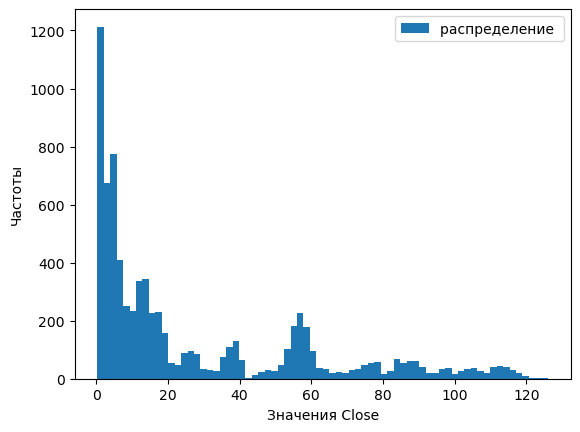

In [34]:
plt.hist(df["Close"], label="распределение ", bins = 70)
plt.xlabel("Значения Close")
plt.ylabel("Частоты")
plt.legend()
plt.show()

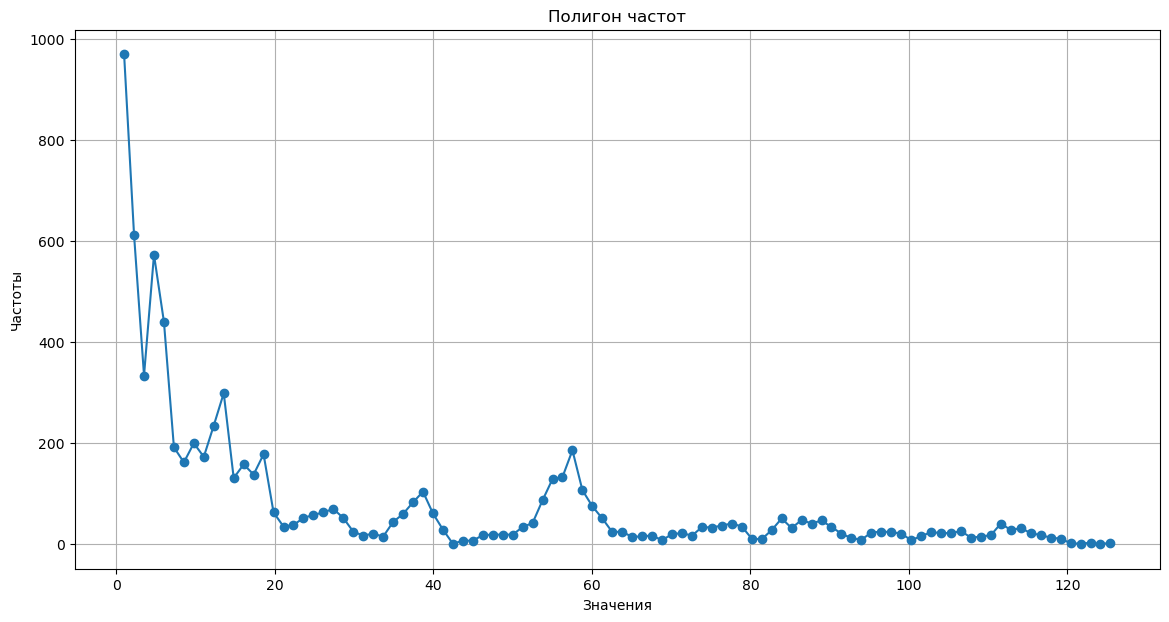

In [29]:
# Определяем количество интервалов (корзин) для гистограммы
num_bins = 100
# Определяем гистограмму
hist, bin_edges = np.histogram(sample, bins=num_bins)

# Центры интервалов (корзин)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(14, 7))
plt.plot(bin_centers, hist, marker='o', linestyle='-')
plt.xlabel('Значения')
plt.ylabel('Частоты')
plt.title('Полигон частот')
plt.grid(True)
plt.show()


## 3. Некоторые оценочные значения:

In [30]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7737.000000,7737.000000,7737.000000,7737.000000,7737.000000,7.737000e+03
mean,27.498965,27.779059,27.216159,27.506354,24.771933,1.497078e+07
std,31.558984,31.843521,31.269904,31.565372,30.189897,1.354806e+07
min,0.328125,0.347656,0.320313,0.335938,0.268461,1.504000e+06
25%,4.171875,4.312500,4.046875,4.190000,3.348388,8.030600e+06
50%,12.810000,12.972500,12.685000,12.792500,10.252940,1.197640e+07
75%,51.680000,52.180000,51.209999,51.680000,45.977592,1.801200e+07
max,126.080002,126.320000,124.809998,126.059998,121.521957,5.855088e+08


In [23]:
res_mean = df[('Close')].mean() 
print('Среднее значение по столбцу Close: ', res_mean)
res_median = df[('Close')].median() 
print('Медианное значение по столбцу Close: ', res_median)
res_var= df[('Close')].var() 
print('Cмещенная дисперсия: ', res_var) #biased variance
res_std=df[('Close')].std()
print('Cтандартное отклонение: ', res_std)
res_min= df[('Close')].min() 
print('минимум:', res_min)
res_max= df[('Close')].max() 
print('максимум: ', res_max) 
res_sum = df[('Close')].sum() 
print('сумма: ', res_sum)

Среднее значение по столбцу Close:  27.50635403101978
Медианное значение по столбцу Close:  12.7925
Cмещенная дисперсия:  996.3727109095618
Cтандартное отклонение:  31.56537202235326
минимум: 0.335938
максимум:  126.059998
сумма:  212816.66113800002


## 4. Квантили, процентили и критические точки

$\textbf{Квантилью уровня p}$ непрерывной случайной величины $\xi$ с функцией распределения $F_\xi(x)$ называется такое значение  $x_p$, для которой справедливо

$$P(X<x_p)=F(x_p)=p,\quad 0<p<1$$

$\textbf{Процентилью уровня q}$ непрерывной случайной величины $\xi$ с функцией распределения $F_\xi(x)$ называется такое значение  $x_q$, для которой справедливо

$$P(X<x_q)=F(x_q)=q\ / \ 100, \quad 0<q<100$$



In [69]:
print ('Сводка данных по столбцу Close, соответствущая 0.0 (нулевой), 0.25, 0.5, 0.75 и 1.0 квантилиям\n')
q = [0, 1/4, 1/2, 3/4, 1]
print (df['Close'].quantile(q=q))

Сводка данных по столбцу Close, соответствущая 0.0 (нулевой), 0.25, 0.5, 0.75 и 1.0 квантилиям

0.00      0.335938
0.25      4.190000
0.50     12.792500
0.75     51.680000
1.00    126.059998
Name: Close, dtype: float64


## 5. Основные выборочные характеристики

Выборочное среднее $\overline{x}$
$$ \overline{x} = \frac{1}{n}\sum\limits_{i=1}^{n} x_i$$

Неисправленная, или смещенная дисперсия $\hat{\sigma}^2$
$$\hat{\sigma}^2 = \frac{1}{n}\sum\limits_{i=1}^n(x_i - \overline{x})^2$$

Исправленная, или несмещенная дисперсия $\hat{s}^2$
$$\hat{s}^2 = \frac{1}{n-1}\sum\limits_{i=1}^n(x_i - \overline{x})^2=\frac{n}{n-1}\hat{\sigma}^2$$

Выборочные стандрартные отклонения $\hat{s}$ и $\hat{\sigma}$

In [199]:
n_vals=[1000, 1500, 2000, 3000] #размеры выборок из историчесикх данных
n_sims= 500 #количество симуляций

mean=np.zeros(len(n_vals)) #[0, 0, 0, 0] средние значения для каждого размера выборки
biased_var=np.zeros(len(n_vals)) #смещенная дисперсия
unbiased_var=np.zeros(len(n_vals)) #несмещенная дисперсия
sigma_biased=np.zeros(len(n_vals)) #стандартные отклонения
sigma_unbiased=np.zeros(len(n_vals))


temp_mean = np.zeros(n_sims) 
temp_biased_var = np.zeros(n_sims)
temp_unbiased_var = np.zeros(n_sims)
temp_sigma_biased = np.zeros(n_sims)
temp_sigma_unbiased = np.zeros(n_sims)

for i, n_val in enumerate(n_vals):
    for j in range(n_sims):
        sample = df['Close'].sample(n = n_val)
        temp_mean[j] = sample.mean()
        temp_biased_var[j] = sample.var(ddof = 1)
        temp_unbiased_var[j] = sample.var()
        temp_sigma_unbiased[j] = sample.std()
        temp_sigma_biased[j] = sample.std(ddof = 1)
    mean[i] = temp_mean.mean()
    biased_var[i] = temp_biased_var.mean()
    unbiased_var[i] = temp_unbiased_var.mean()
    sigma_biased[i] =temp_sigma_biased.mean()
    sigma_unbiased[i] = temp_sigma_unbiased.mean()
    
print(f'Mean = {mean.mean()}')
print(f'Sigma^2 = {biased_var.mean()}')
print(f'S^2 = {biased_var.mean()}')
print(f'Sigma = {sigma_unbiased.mean()}')
print(f'S = {sigma_biased.mean()}')

        

Mean = 27.506693795128584
Sigma^2 = 995.9744825691857
S^2 = 995.9744825691857
Sigma = 31.55418320958131
S = 31.55418320958131


## 6. Графики и гистограммы (не для всего промежутка времения, а выборка из симуляций)

In [179]:
from scipy.stats import norm
n_vals=[1000, 1500, 2000, 3000] #размеры выборок из историчесикх данных
n_sims= 500 #количество симуляций
a = 0
sigma = 1
mean=np.zeros(len(n_vals)) #[0, 0, 0, 0] средние значения для каждого размера выборки
pdf = np.zeros(len(n_vals), dtype=np.ndarray)
#временные 
temp_mean = np.zeros(n_sims) 
for i, n_val in enumerate(n_vals):
    for j in range(n_sims):
        sample = df['Close'].sample(n = n_val)
        temp_mean[j] = sample.mean()


$\textbf{Гистограмма}$

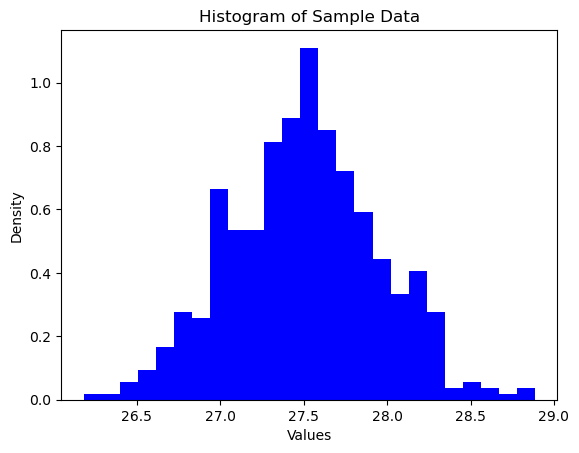

In [180]:
import matplotlib.pyplot as plt

plt.hist(temp_mean, bins=25, color='blue', density = True)

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of Sample Data')

# Show plot
plt.show()

$\textbf{График с квантилиями}$

In [297]:
from scipy.stats import norm
n_vals=[1000, 1500, 2000, 3000] #размеры выборок из историчесикх данных
n_sims= 500 #количество симуляций
a = 0
sigma = 1
mean=np.zeros(len(n_vals)) #[0, 0, 0, 0] средние значения для каждого размера выборки
sample = np.zeros(len(n_vals), dtype=np.ndarray)
#временные 
temp_mean = np.zeros(n_sims) 
for i, n_val in enumerate(n_vals):
    for j in range(n_sims):
        r = df['Close'].sample(n = n_val)
        temp_mean[j] = r.mean()
    sample[i] = temp_mean.mean() 
    x[i] = np.linspace(min(sample), max(sample), n_val) # x points for pdf
    pdf[i] = norm.pdf(x[i], loc=a, scale=sigma) #True Probability Density Function aka p(x, mu, sigma)


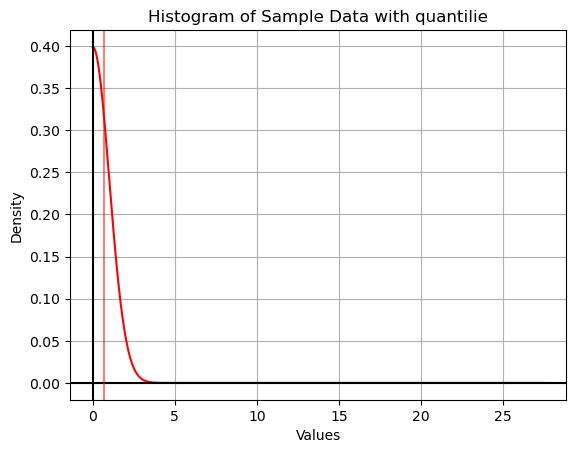

In [295]:
import matplotlib.pyplot as plt

plt.plot(x[0], pdf[0], color='red')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of Sample Data with quantilie')


p = 0.75
x_p = norm.ppf(p, loc=a, scale=sigma)

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.axvline(x=x_p, color='red', alpha=0.5)
plt.grid()


# Show plot
plt.show()

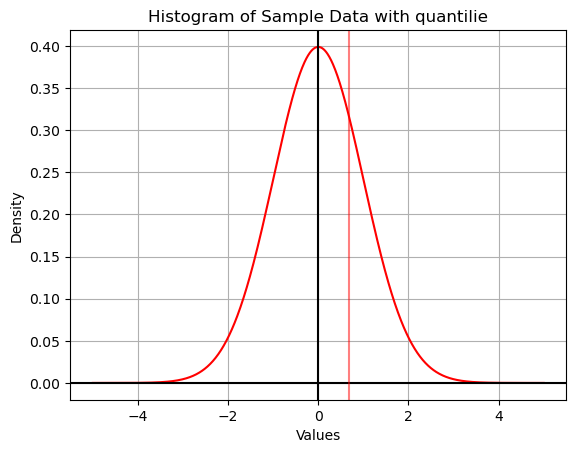

In [276]:
from scipy.stats import norm
n_vals=[1000, 1500, 2000, 3000] #размеры выборок из историчесикх данных
n_sims= 500 #количество симуляций
a = 0
sigma = 1
mean=np.zeros(len(n_vals)) #[0, 0, 0, 0] средние значения для каждого размера выборки
sample = np.zeros(len(n_vals), dtype=np.ndarray)
#временные 
temp_mean = np.zeros(n_sims) 
for i, n_val in enumerate(n_vals):
    for j in range(n_sims):
        r = df['Close'].sample(n = n_val)
    sample[i] = r.mean() 
    x[i] = np.linspace(-5, 5, n_val) # x points for pdf
    pdf[i] = norm.pdf(x[i], loc=a, scale=sigma) #True Probability Density Function aka p(x, mu, sigma)
    
import matplotlib.pyplot as plt

plt.plot(x[0], pdf[0], color='red')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of Sample Data with quantilie')


p = 0.75
x_p = norm.ppf(p, loc=a, scale=sigma)

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.axvline(x=x_p, color='red', alpha=0.5)
plt.grid()


# Show plot
plt.show()

$\textbf{График с критическими границами}$

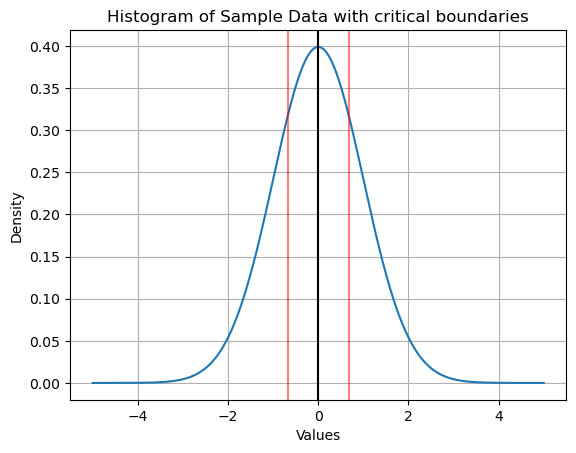

In [268]:
a, sigma = 0, 1

alpha = 0.5
u_down = norm.ppf(alpha/2, loc=a, scale=sigma)
u_up = norm.ppf(1-alpha/2, loc=a, scale=sigma)

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of Sample Data with critical boundaries')

plt.plot(x[0], pdf[0])
plt.axvline(x=0, color='black')
plt.axvline(x=u_down, color='red', alpha=0.5)
plt.axvline(x=u_up, color='red', alpha=0.5)
plt.grid()
plt.show()

## 7. Распределения хи-квадрат, Стьюдента и Фишера

$$\chi_n^2=\sum\limits_{i=1}^n \frac{(\xi_i-a)^2}{\sigma^2},\quad \xi_i\sim \mathcal{N}(a, \sigma^2).$$

Плотность распределения случайной величины $\chi_n^2$ с $n$ степенями свободы имеет вид:

$$\rho_{\chi^2}(x)=\frac{1}{2^{\frac{n}{2}}\Gamma\left(\frac{n}{2}\right)}x^{\frac{n}{2}-1}e^{-\frac{x}{2}},\quad x>0$$

Функция распределения:

$$F_{\chi^2}(x)=\frac{1}{2^{\frac{n}{2}}\Gamma\left(\frac{n}{2}\right)}\int\limits_0^x t^{\frac{n}{2}-1}e^{-\frac{t}{2}}dt,\quad x>0$$

Основные числовые характеристики распределения $\chi_n^2$:
- Математическое ожидание $-\ \mathbb{E}\chi_n^2 = n$;
- Дисперсия $-\ \mathbb{D}\chi_n^2 = 2n$;

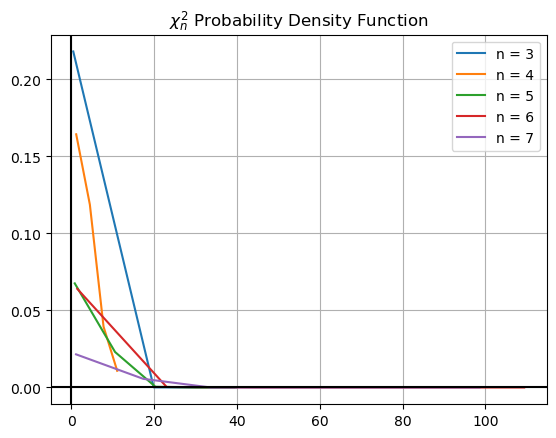

In [39]:
from scipy.stats import norm
from scipy.stats import chi2

n_sims= 1000 #количество симуляций
n_vals = [3, 4, 5, 6, 7]
N = 1500
x = np.zeros(len(n_vals), dtype=object)
y = np.zeros(len(n_vals), dtype=object)
for i, n_val in enumerate(n_vals):
    for j in range(n_sims):
        r = df['Close'].sample(n = n_val)
    a=min(r)
    b=max(r)
    x[i] = np.linspace(a,b, n_val) # x points for pdf
    
for i, n_val in enumerate(n_vals):  
    y[i] = chi2.pdf(x[i], df=n_vals[i]) #True Probability Density Function aka p(x, mu, sigma)
    plt.plot(x[i], y[i], label = f'n = {n_vals[i]}')




plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.legend()
plt.title(r'$\chi_n^2 $ Probability Density Function')
plt.grid()
plt.show()

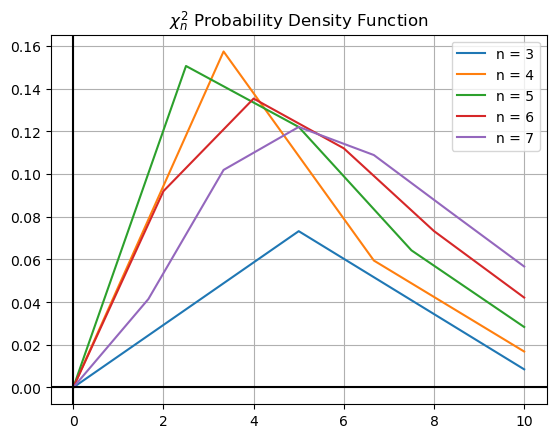

In [41]:
from scipy.stats import norm
from scipy.stats import chi2

n_sims= 1000 #количество симуляций
n_vals = [3, 4, 5, 6, 7]
N = 1000
x = np.zeros(len(n_vals), dtype=object)
y = np.zeros(len(n_vals), dtype=object)
for i, n_val in enumerate(n_vals):
    
    x[i] = np.linspace(0,10, n_val) # x points for pdf
    
for i, n_val in enumerate(n_vals):  
    y[i] = chi2.pdf(x[i], df=n_vals[i]) #True Probability Density Function aka p(x, mu, sigma)
    plt.plot(x[i], y[i], label = f'n = {n_vals[i]}')




plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.legend()
plt.title(r'$\chi_n^2 $ Probability Density Function')
plt.grid()
plt.show()

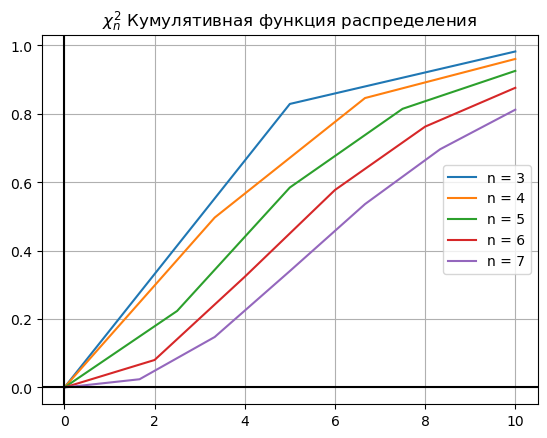

In [45]:
for i in range(len(n_vals)):
    y[i] = chi2.cdf(x[i], df=n_vals[i])
    plt.plot(x[i], y[i], label = f'n = {n_vals[i]}')

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.legend()
plt.title(r'$\chi_n^2 $ Кумулятивная функция распределения')
plt.grid()
plt.show()